### Q24 Analysis based on Religions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("pew_research.csv")
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18252\1885287178.py:3: DtypeWarning: Columns (12,13,14,15,101,104,110,111,112,113,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("pew_research.csv")


,QRID,weight,SurveyPublic,DEMONYM,Q1,Q2a,Q2b,Q2c,Q2d,Q3,...,QZIPHKG,QZIPHKG2,QZIPJPN2,QZIPKOR,QZIPTWN,VietnamRegion,GenderRec,Language,ISCED,UrbanVietnam
0,1300002,0.469825,1,1,1,3,3,3,3,2,...,17,3,,,,,2,1,5,
1,1300003,0.546789,1,1,3,1,2,1,3,2,...,17,3,,,,,2,1,5,
2,1300049,0.703324,1,1,2,1,3,1,3,2,...,10,3,,,,,1,1,5,
3,1300057,0.844956,1,1,1,3,3,3,3,2,...,3,1,,,,,1,1,3,
4,1300065,0.552330,1,1,3,3,3,3,3,2,...,3,1,,,,,2,1,5,


#### Extract Required Data

In [4]:
q24_columns = ['QCURREL', 'Q24a', 'Q24b', 'Q24c', 'Q24d']
q24_data = df[q24_columns]
q24_data.head()

,QCURREL,Q24a,Q24b,Q24c,Q24d
0,8,2,2,2,2
1,2,2,2,2,2
2,8,1,2,2,2
3,7,2,2,2,2
4,1,1,2,1,2


### Add a new coulumn with names of religions

In [5]:
# Setting or naming values
religions = {1:"Buddhist", 2:"christian", 3:"Muslim",
            4:"Shinto", 5:"Daoist", 6:"Confucian",
            7:"local_religion",8:"No religion",9:"some other religion",
            10:"combination of religions", 98:"Don't know", 99:"Refused"}

In [6]:
q24_data['Religion'] = q24_data['QCURREL'].map(religions)
q24_data['Religion'] = q24_data['Religion']
q24_data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18252\3443733522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q24_data['Religion'] = q24_data['QCURREL'].map(religions)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18252\3443733522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q24_data['Religion'] = q24_data['Religion']


,QCURREL,Q24a,Q24b,Q24c,Q24d,Religion
0,8,2,2,2,2,No religion
1,2,2,2,2,2,christian
2,8,1,2,2,2,No religion
3,7,2,2,2,2,local_religion
4,1,1,2,1,2,Buddhist


#### Dropping rows with 98 and 99

In [7]:
q24_data = q24_data[~q24_data.isin([99,98]).any(axis=1)]
q24_data

,QCURREL,Q24a,Q24b,Q24c,Q24d,Religion
0,8,2,2,2,2,No religion
1,2,2,2,2,2,christian
2,8,1,2,2,2,No religion
3,7,2,2,2,2,local_religion
4,1,1,2,1,2,Buddhist
...,...,...,...,...,...,...
10384,4,2,2,2,1,Shinto
10385,1,1,2,2,1,Buddhist
10386,8,1,2,1,1,No religion
10387,1,2,2,2,2,Buddhist


### Q24: Have you ever felt that the spirit of an ancestor has done each of the following, or not? 

#### Buddhist

In [9]:
# Extract rows with responses from buddhists
buddhist = q24_data[q24_data['Religion'].str.strip().str.lower() == 'buddhist']
buddhist

,QCURREL,Q24a,Q24b,Q24c,Q24d,Religion
4,1,1,2,1,2,Buddhist
5,1,1,2,2,2,Buddhist
10,1,1,2,2,2,Buddhist
15,1,1,2,2,1,Buddhist
34,1,2,2,2,2,Buddhist
...,...,...,...,...,...,...
10374,1,2,2,2,2,Buddhist
10383,1,2,2,2,2,Buddhist
10385,1,1,2,2,1,Buddhist
10387,1,2,2,2,2,Buddhist


In [10]:
# Selecting only the Q24a, Q24b, Q24c, and Q24d columns
q24_responses = q24_data[['Q24a', 'Q24b', 'Q24c', 'Q24d']]

# name columns with actual question meanings
q24_data_renamed = q24_data.rename(columns={
    'Q24a': 'Helped you',
    'Q24b': 'Punished you',
    'Q24c': 'Come to visit you in a dream',
    'Q24d': 'Come to be with you in any other form'
})

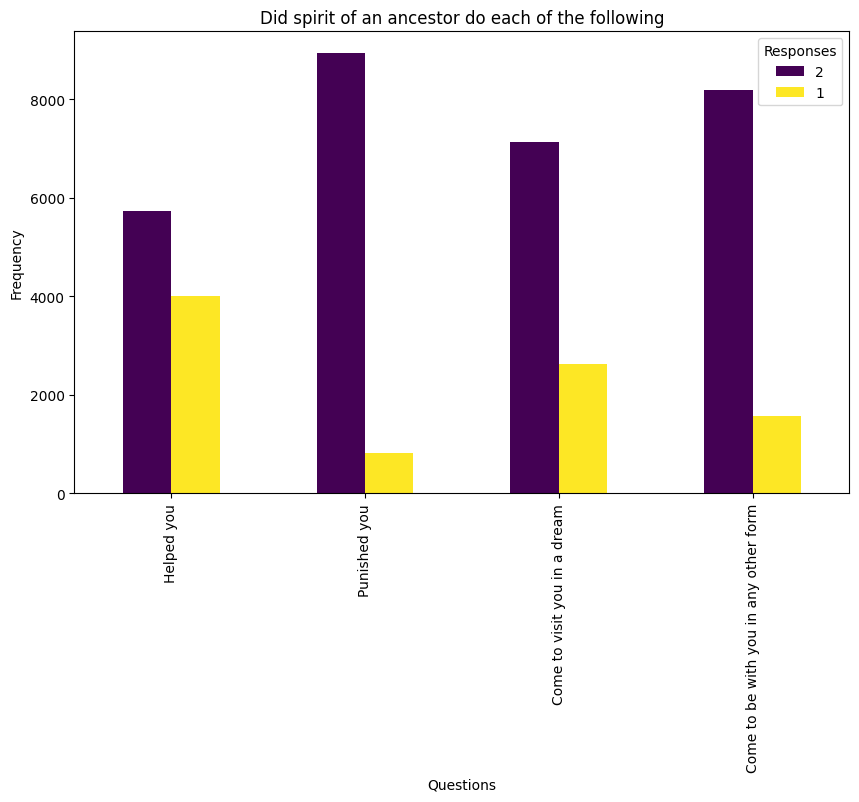

In [14]:
q24_responses = q24_data_renamed[['Helped you', 'Punished you', 'Come to visit you in a dream', 'Come to be with you in any other form']]

# Summing the responses for each question
response_counts = q24_responses.apply(pd.Series.value_counts)

# Plotting the responses
#response_counts.plot(kind='bar', figsize=(10, 6))

# Plot a bar chart
response_counts.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Customizing the plot
plt.title('Did spirit of an ancestor do each of the following')
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Keep x-axis labels readable
plt.legend(title="Responses")

# Show the plot
plt.show()